# Engineering Design
### Let's observe the factory

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
df = pd.DataFrame({
    "run-order":pd.Series(np.arange(20)),
    "ring-angle":pd.Series(["45deg","45deg","45deg","45deg","45deg","45deg","45deg","45deg","45deg","45deg","55deg","55deg","55deg","55deg","55deg","55deg","55deg","55deg","55deg","55deg"]),
    "yield":pd.Series([88.7,81.4,84.5,84.8,87.3,80.7,85.1,81.7,83.7,84.5,84.7,86.1,83.2,91.9,86.3,79.3,82.6,89.1,83.7,88.5]),                           
    })

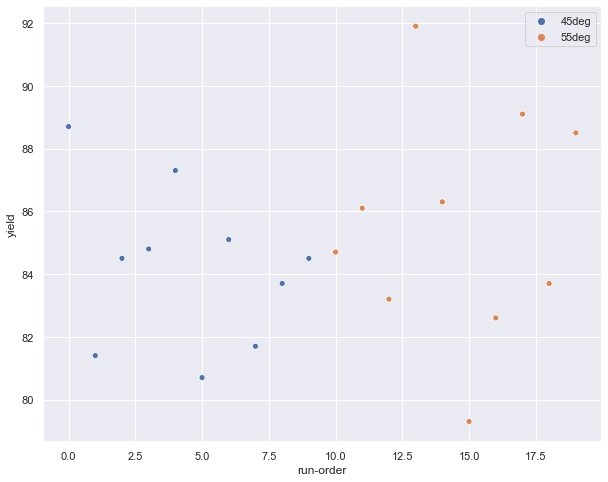

In [185]:
ax=sns.scatterplot(data=df, x="run-order", y="yield", hue=df["ring-angle"].to_list())

Is there a difference between 55 degree focus rings and 45 degrees?

<AxesSubplot:xlabel='ring-angle', ylabel='yield'>

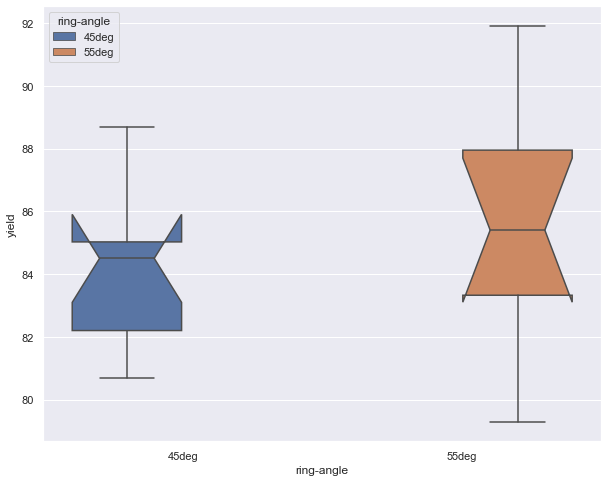

In [186]:
sns.boxplot(data=df, x="ring-angle", y="yield", hue="ring-angle",notch=True)

Yes, it is small but measurable; about 1.5%

### Consider the Distribution of differences
![ Distribution ](images/distribution-of-differences.png)

A difference of 1.5% is significant when compared to the typical distribution of differences between random lots

### Beware Simpson's paradox 
![ paradox ](images/simpsons-paradox.png)

Decisions based on observational data are prone to data collection bias.

It could be that the true effect is the opposite of the observed effect.

### Let's Design an experiment

In [187]:
df = pd.DataFrame({
    "time":pd.Series([
        10,10,10,10,
        10,10,10,10,
        30,30,30,30,
        30,30,30,30
    ]),
    "temperature":pd.Series([
        50,50,50,50,
        70,70,70,70,
        50,50,50,50,
        70,70,70,70]),
    "pressure":pd.Series([
        200,200,300,300,
        200,200,300,300,
        200,200,300,300,
        200,200,300,300]),    
    })

![ DOE ](images/3d-DOE.png)

## Optimize

![ DOE ](images/optimize-model.png)

Decreasing temperature 1deg from 60 to 59 improves yeild while maintaining reliability and keeping critical dimensions on target (maintaining device performance with respect to RC Delay). 

This change allows for standardization of hardware which increases overall throughput.